## **Pump it Up: Data Mining the Water Table**
Can you predict which water pumps are faulty to promote access to clean, potable water across Tanzania? This is an intermediate-level practice competition.

Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

www.drivendata.org

## **Objetivo**
Haciendo uso de los datos cargados en la web de Taarifa y el Ministerio de Tanzania del Agua, nuestro objetivo es predecir qué bombas funcionan, cuáles no y cuáles necesitan una reparación. Entender cuáles fallarán es importante por los siguientes motivos:

- Predecir la funcionalidad de todas las bombas de agua subterránea que se encuentran en el territorio con modelos precisos, podría ayudar a ahorrarle al gobierno de Tanzania mucho tiempo y dinero.
- Estos modelos pueden ayudar a reducir el costo de inspección de cada bomba de agua.
- El gobierno puede usar este estudio para saber exactamente cuál es la situación del bombeo de su agua.


El presente trabajo va a estar dividido en tres partes: siendo la primera el Análisis Exploratorio de los Datos, la segunda el Preprocesado de los mismos y la tercera la Selección del Modelo y Entrega.


# I. Análisis Exploratorio de los Datos

## 1. Descripción de los datos
Comenzamos con una pequeña descripción de los datos con los que vamos a trabajar:
### 1.1 Características

* amount_tsh - Cantidad de agua para bombear
* date_recorded - Fecha de inserción de datos
* funder - Quién fundó el pozo
* gps_height - Altitud del pozo
* installer - Organización que lo instaló
* longitude - Coordenadas GPS
* latitude - Coordenadas GPS
* wpt_name - Nombre de la bomba (si es que lo tiene)
* num_private - Número
* basin - Cuenca geográfica
* subvillage - Localización geográfica
* region - Localización geográfica
* region_code - Localización geográfica (en código)
* district_code - Localización geográfica (en código)
* lga - Localización geográfica
* ward - Localización geográfica
* population - Población junto al pozo
* public_meeting - Verdadero/Falso
* recorded_by - Grupo que introduce estos datos
* scheme_management - Quién gestiona la bomba
* scheme_name - Quién maneja la bomba
* permit - Si la bomba está permitida o no
* construction_year - Año de construcción de la bomba
* extraction_type - Tipo de extracción de la bomba
* extraction_type_group - Tipo de extracción de la bomba
* extraction_type_class - Tipo de extracción de la bomba
* management - Cómo se gestiona la bomba
* management_group - Cómo se gestiona la bomba
* payment - Coste del agua
* payment_type - Coste del agua
* water_quality - Calidad del agua
* quality_group - Calidad del agua
* quantity - Cantidad de agua
* quantity_group - Cantidad de agua
* source - Fuente del agua
* source_type - Fuente del agua
* source_class - Fuente del agua
* waterpoint_type - Tipo de bomba
* waterpoint_type_group - Tipo de bomba



### 1.2 Etiquetas
Las etiquetas en este dataset son simples. Hay tres valores posibles:

* **functional** - La bomba funciona y no es necesario repararla
* **functional needs repair** - Funciona, pero necesita reparación
* **non functional** - La bomba de agua no funciona

## Importación de librerías

In [ ]:
from google.colab import files

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import datetime as dt
import warnings

# Settings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
%matplotlib inline

from sklearn.metrics import accuracy_score

## Cargamos los datos

In [ ]:
train_values_df = pd.read_csv("https://raw.githubusercontent.com/carolProg/PROYECTO/main/training_set_values.csv")    # train set data

train_labels_df = pd.read_csv("https://raw.githubusercontent.com/carolProg/PROYECTO/main/training_set_labels.csv")      # train set labels data

test_values_df = pd.read_csv("https://raw.githubusercontent.com/carolProg/PROYECTO/main/test_set_values.csv") # test set values

In [ ]:
train_values_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
train_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [ ]:
test_values_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [ ]:
print("# Train Values: {}".format(train_values_df.shape))
print("# Train Labels: {}".format(train_labels_df.shape))
print("# Test Values: {}".format(test_values_df.shape))

# Train Values: (59400, 40)
# Train Labels: (59400, 2)
# Test Values: (14850, 40)


In [ ]:
train_values_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
train_labels_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


La variable objetivo es 'status_group' con tres valores posibles:

* 0 - functional - La bomba funciona y no es necesario repararla
* 1 - functional needs repair - Funciona, pero necesita reparación
* 2 - non functional - La bomba de agua no funciona

In [ ]:
# looking at label distribution
train_labels_df.groupby(['status_group']).size()

status_group
functional                 32259
functional needs repair     4317
non functional             22824
dtype: int64

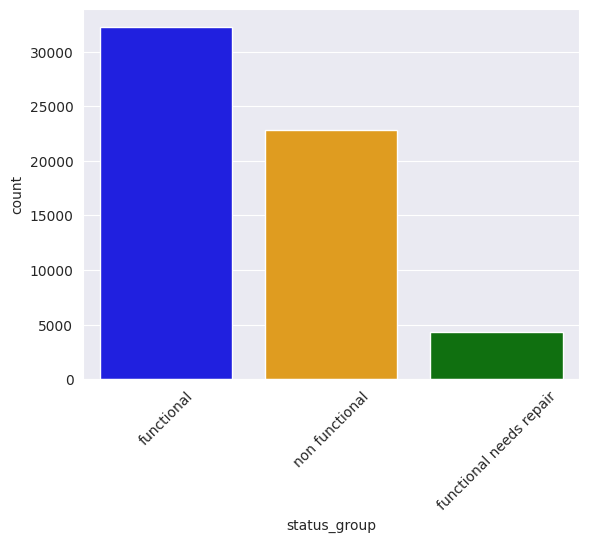

In [ ]:
# sns.formatplot('status_group', data=train_labels_df, aspect=2, kind='count');
colores = ['blue', 'orange', 'green']

# Suponiendo que 'train_labels_df' es tu DataFrame y 'status_group' la columna con categorías
sns.countplot(x='status_group', data=train_labels_df, palette=colores)
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor visualización si es necesario
plt.show()


Very small amount of 'functional needs repair'. It will probably be the hardest to predict . Datos no balanceados Del gráfico anterior, es fácil ver que nuestro conjunto de datos está desbalanceado. La razón por la cual este conjunto de datos está desequilibrado podría deberse al hecho de que  Es importante mencionar que los árboles de decisión y los bosques aleatorios son extremadamente sensibles a los datos desequilibrados.

In [ ]:
majority_class = train_values_df['status_group'].mode()[0]
print("The most frequent label is", majority_class)

y_prelim_pred = np.full(shape=train_values_df['status_group'].shape, fill_value=majority_class)
accuracy_score(train_values_df['status_group'], y_prelim_pred)

Significa que podemos empezar a hacer una estimación del 54.31% de probabilidad de que una bomba cualquiera de esta base de datos funcione bien (es decir, sea *functional*). Esto nos sirve de base para futuras predicciones.

Dado que nuestra variable objetivo es discreta, necesitaremos un algoritmo de clasificación supervisada, que son los que aplicaremos más adelante.

In [ ]:
test_values_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [ ]:
#train_values_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


Con estas tablas podemos comprobar la distribución de los datos. Observamos que hay varios valores faltantes para los *min* de las variables. Esto se refiere a la existencia de valores *missing* que tendremos que tratar antes de seguir con los modelos.

In [ ]:
train_labels_df.drop(columns=['id'],inplace=True)
train_values_df.drop(columns=['id'],inplace=True)

In [ ]:
joined_df = train_values_df.join(train_labels_df)
print(joined_df.shape)

(59400, 40)


In [ ]:
#Descargo el dataframe obtenido para inspeccionarlo

with open('datos_train.csv', 'w') as f:
  joined_df.to_csv(f,  index = False)

files.download('datos_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

OJO!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

## **Valores nulos**

La expresión train_values.isnull().sum() * 100 / len(train_values) en un contexto de programación, particularmente en Python utilizando la biblioteca Pandas, es una forma común de calcular el porcentaje de valores faltantes (o NAs, del inglés "Not Available") para cada variable en un conjunto de datos.

Desglosemos esta expresión paso a paso para entender mejor qué hace cada parte:

train_values.isnull(): Este método devuelve un nuevo DataFrame donde cada celda es un valor booleano que indica si el dato original es un valor faltante (True) o no (False).

sum(): Cuando se utiliza después de isnull(), este método suma la cantidad de True (es decir, valores faltantes) en cada columna del DataFrame. El resultado es una serie que representa el total de valores faltantes por cada columna.

len(train_values): Esto devuelve el número total de filas en el DataFrame train_values. Este valor se utiliza como denominador para calcular el porcentaje.

* 100 / len(train_values): Multiplicar por 100 y dividir por el número total de filas convierte el recuento de valores faltantes en un porcentaje. Esto da como resultado el porcentaje de valores faltantes en cada columna del DataFrame.

En resumen, esta línea de código calcula y muestra el porcentaje de datos faltantes en cada columna del DataFrame train_values. Es una herramienta útil para evaluar rápidamente cuánta información falta en cada variable y decidir cómo manejar estos valores faltantes en el análisis o la preparación de datos.

In [1]:
#joined_df.isnull().sum() * 100 / len(joined_df)
joined_df.isnull().sum()
## counting NAs per column
# all_data.isnull().sum()\[:10]
# Few variables have NAs, let's go through each of the variables to spot some other possible problems

NameError: name 'joined_df' is not defined

In [ ]:
#train_labels_df.isnull().sum() * 100 / len(train_values_df)

status_group    0.0
dtype: float64

In [ ]:
#test_values_df.isnull().sum() * 100 / len(train_values_df)

id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    1.464646
gps_height                0.000000
installer                 1.476431
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.000000
num_private               0.000000
basin                     0.000000
subvillage                0.166667
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            1.382155
recorded_by               0.000000
scheme_management         1.631313
scheme_name              12.191919
permit                    1.240741
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

El dataset presenta valores nulos

 ## **Valores NaN**

In [ ]:
train_values_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
train_labels_df.isna().sum()

status_group    0
dtype: int64

In [ ]:
test_values_df.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    870
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7242
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

## **Tipos de Datos**

In [ ]:
joined_df.dtypes

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

In [ ]:
#train_labels_df.dtypes

status_group    object
dtype: object

In [ ]:
#test_values_df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [ ]:
#Analysing missing values and unique column values
# "Analizando valores faltantes y valores únicos en las columnas"
joined_df.isna().sum()      # Number of null values in the dataframe columns

In [ ]:
for col in train_values_df.columns:
  print('\033[1m' + col + '\033[0m' +" : "+str(len(joined_df[col].unique())))

## **Distribución de Datos**

Vamos a empezar viendo si nuestro dataset está balanceado.

In [ ]:
sns.countplot(x="damage_grade", data=train_labels)
plt.title("Damage Grade Distribution")
plt.show()